# TEXT & Emojis hate speech detection

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib
from matplotlib import backends
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Cellar/python3/3.6.3/F

In [2]:
matplotlib.__version__

'2.1.2'

In [3]:
#df = pd.read_csv("twitter-hate-speech-classifier-DFE-a845520.csv",encoding = "ISO-8859-1")

In [4]:
df = pd.read_csv("labeled_data.csv")

In [5]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [6]:
#df["tweet_text"]
df["tweet"]

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5        !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
6        !!!!!!"@__BrighterDays: I can not just sit up ...
7        !!!!&#8220;@selfiequeenbri: cause I'm tired of...
8        " &amp; you might not get ya bitch back &amp; ...
9        " @rhythmixx_ :hobbies include: fighting Maria...
10       " Keeks is a bitch she curves everyone " lol I...
11                      " Murda Gang bitch its Gang Land "
12       " So hoes that smoke are losers ? " yea ... go...
13           " bad bitches is the only thing that i like "
14                                 " bitch get up off me "
15                         " bitch nigga miss me with it "
16                                  " bitch plz whatever

In [7]:
df["class"]

0        2
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
24753    1
24754    1
24755    1
24756    1
24757    1
24758    1
24759    1
24760    1
24761    1
24762    1
24763    1
24764    1
24765    1
24766    1
24767    2
24768    1
24769    1
24770    1
24771    1
24772    1
24773    1
24774    1
24775    1
24776    0
24777    0
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64

In [8]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

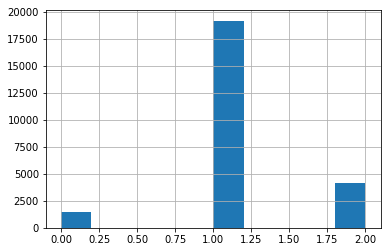

In [10]:
df["class"].hist()

In [11]:
tweets=df.tweet

In [12]:
hateDict = pd.read_csv('/Users/oliviablood/Documents/Course/2160Data_Mining/projecct/hate-speech-and-offensive-language/lexicons/hatebase_dict.csv', header = None)
hateDict.columns = ['hateWord']
hateDict.head()

,hateWord
0,"uncivilised',"
1,"'gypo',"
2,"'gypos',"
3,"'cunt',"
4,"'cunts',"


# 2. Data Preprocessing

## 2.1 Emoji Preprocessing
<b> convert emojis to shortname

In [13]:
emoji_code = pd.read_csv("emoji_modified.csv")
emoji = emoji_code[['attributes.html','attributes.name']]

In [14]:
emoji.head()

,attributes.html,attributes.name
0,&#128514;,joy
1,&#10084;,heart
2,&#128525;,heart_eyes
3,&#128557;,sob
4,&#128522;,blush


In [15]:
emoji['attributes.name'] = emoji['attributes.name'].str.replace("_", " ")
emoji_dic = emoji.set_index('attributes.html').to_dict().get('attributes.name')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
# emoji decimal code -> emoji name
for i, row in df.iterrows():
    tweet_content = row['tweet']
    decimal_code = re.findall(r'&#[0-9]*;', tweet_content) # decimal code list
    for code in decimal_code:
        name = emoji_dic.get(code)
        if name == None: 
            name = ""
        tweet_content = re.sub(code, str(name)+' ', tweet_content)
    df.at[i,"tweet"] = tweet_content

In [17]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## 2.2 Text Preprocessing
### 2.2.1 stopword without negative meaning

In [18]:
stopwords = nltk.corpus.stopwords.words("english")

In [19]:
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

In [20]:
negativeNotion = ['but','no','nor','not',"don't",'ain','aren',"aren't",'couldn',"couldn't",
                  'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",
                  'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't", 
                  'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

In [21]:
for i in negativeNotion:
    if(i in stopwords):
        stopwords.remove(i)

### 2.2.2 constraction

In [22]:
contractions = { "ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have",
                "cause": "because", "could've": "could have","couldn't": "could not","couldn't've": 
                "could not have","didn't": "did not", "doesn't": "does not","don't": "do not","hadn't": "had not",
                "hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he had",
                "he'd've": "he would have","he'll": "he shall","he'll've": "he shall have","he's": "he has",
                "how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how has",
                "i'd": "I had","i'd've": "I would have","i'll": "I shall","i'll've": "I shall have",
                "i'm": "I am","i've": "I have","isn't": "is not","it'd": "it had","it'd've": "it would have",
                "it'll": "it shall","it'll've": "it shall have","it's": "it has","let's": "let us","ma'am": "madam",
                "mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",
                "must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have",
                "o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have",
                "shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she had","she'd've": "she would have",
                "she'll": "she shall","she'll've": "she shall have","she's": "she has","should've": "should have","shouldn't": "should not",
                "shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would",
                "that'd've": "that would have","that's": "that has","there'd": "there had","there'd've": "there would have","there's": "there has",
                "they'd": "they had", "they'd've": "they would have", "they'll": "they shall",
                "they'll've": "they shall have","they're": "they are","they've": "they have","to've": "to have",
                "wasn't": "was not","we'd": "we had","we'd've": "we would have","we'll": "we will", "we'll've": "we will have",
                "we're": "we are","we've": "we have","weren't": "were not","what'll": "what shall",
                "what'll've": "what shall have","what're": "what are","what's": "what has","what've": "what have",
                "when's": "when has","when've": "when have","where'd": "where did","where's": "where has",
                "where've": "where have","who'll": "who shall","who'll've": "who shall have","who's": "who has",
                "who've": "who have","why's": "why has","why've": "why have","will've": "will have",
                "won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not","wouldn't've": "would not have",
                "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                "y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "you shall",
                "you'll've": "you shall have","you're": "you are","you've": "you have","that's": "that is",
                "ya": "you","im": "I am"}

### 2.2.3 stemming

In [24]:
stemmer = PorterStemmer()

In [25]:
def preprocess(text_string):
    space_pattern='\s+'
    giant_url_regex=('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern,' ',text_string)
    parsed_text = re.sub(giant_url_regex,'',parsed_text)
    parsed_text = re.sub(mention_regex,'',parsed_text)
    
    return parsed_text
#     cleanstring = []
#     #expand contractions
#     for o in parsed_text.split(" "):
#         if o in contractions:
#             cleanstring.append(contractions.get(o))
#         else:
#             cleanstring.append(o) 
#     return ''.join(cleanstring)

In [26]:
def tokenize(tweet):
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

In [27]:
def basic_tokenize(tweet):
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

### 2.2.4 lemmatization

In [28]:
#tokenize and lemmetize
from textblob import TextBlob
from textblob import Word

def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

def tokenize_lemmetize(tweet):
#     tweet = TextBlob(tweet.lower())
    tokens = lemmatize_with_postag(tweet.lower())
    return tokens

# 3 features
## 3.1 tfidf 
### 3.1.1 tfidf (stem)

In [31]:
#tfidf using tokenizing with stem
vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1,4),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=True,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [33]:
#Construct tfidf matrix and get relevant scores
tfidf = vectorizer.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}
idf_vals = vectorizer.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

### 3.1.2 tfidf (lemmatize)

In [32]:
#tfidf using tokenizing with lemmatize
vectorizer_lem = TfidfVectorizer(
    tokenizer=tokenize_lemmetize,
    preprocessor=preprocess,
    ngram_range=(1,4),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=True,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [34]:
#Construct tfidf_lem matrix and get relevant scores
tfidf_lem = vectorizer_lem.fit_transform(tweets).toarray()
vocab_lem = {v:i for i, v in enumerate(vectorizer_lem.get_feature_names())}
idf_vals_lem = vectorizer_lem.idf_
idf_dict_lem = {i:idf_vals_lem[i] for i in vocab_lem.values()} #keys are indices; values are IDF scores

In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/oliviablood/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 3.2 pos tag tfidf

In [36]:
#Get POS tags for tweets and save as a string
tweet_tags = []
# we store a word with pos to the list
for t in tweets: 
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags] 
    tag_str = " ".join(tag_list) 
    tweet_tags.append(tag_str)

In [37]:
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1,4),
    stop_words=None,
    use_idf=False,
    smooth_idf=True,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )

In [38]:
#Construct POS TF matrix and get vocab dict
pos = pos_vectorizer.fit_transform(pd.Series(tweet_tags)).toarray()
pos_vocab = {v:i for i, v in enumerate(pos_vectorizer.get_feature_names())}

## 3.3 other features

In [39]:
#Now get other features
sentiment_analyzer = VS() 

In [41]:
#parse text, count twitter object 
def count_twitter_objs(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

In [42]:
#calculate the number of other feature, row: feature name; column is the socre - similarity.
def other_features(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    words = preprocess(tweet)

    syllables = textstat.syllable_count(words)
    num_chars = sum(len(w) for w in words)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(words.split()))
    
    num_hateful_words = 0
    for word in hateDict:
        if word in words:
            num_hateful_words += 1

    #Flesch-Kincaid grade level: measure readability of text
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    #Flesch readability ease: measure readability of text
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    #是否转发？
    twitter_objs = count_twitter_objs(tweet)
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms, num_hateful_words, sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[2], twitter_objs[1],twitter_objs[0], retweet]
    return features

In [43]:
def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [44]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "num_hateful_words","vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

In [45]:
feats = get_feature_array(tweets)

In [46]:
feats

array([[  8.3 ,  79.94,  30.  , ...,   1.  ,   0.  ,   0.  ],
       [  4.7 ,  90.13,  19.  , ...,   1.  ,   0.  ,   0.  ],
       [  5.8 ,  89.25,  23.  , ...,   2.  ,   0.  ,   1.  ],
       ...,
       [  3.1 ,  96.03,  15.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.6 , 103.05,   8.  , ...,   0.  ,   0.  ,   0.  ],
       [  9.8 ,  55.22,  27.  , ...,   0.  ,   1.  ,   0.  ]])

## 3.4 combine all features

### 3.4.1 combine all features based on tfidf_stem

In [52]:
#Now join tfidf_stem, pos_tfidf and other features
#把feature选完了,词的tfidf,词性的tfidf, other features
M = np.concatenate([tfidf,pos,feats],axis=1)

In [53]:
M.shape

(24783, 12862)

In [55]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

In [57]:
len(feature_names)

12862

### 3.4.2 combine all features based on tfidf_lem

In [59]:
M_lem = np.concatenate([tfidf_lem, pos, feats], axis = 1)
M_lem.shape

(24783, 15018)

In [61]:
#Finally get a list of variable names
variables_lem = ['']*len(vocab_lem)
for k,v in vocab_lem.items():
    variables_lem[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names_lem  = variables_lem + pos_variables + other_features_names

In [62]:
len(feature_names_lem)

15018

In [49]:
## Running model

## 4. Model Selection

### 4.1 using stem

In [63]:
X = pd.DataFrame(M)
y = df['class'].astype(int)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [74]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

In [121]:
def train_model(model):
    # feature selection
    select = SelectFromModel(model)
    select.fit(X_train, y_train)
    X_new = select.transform(X_train)
    X_test_new = select.transform(X_test)

    # cross validation 
    gs = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, random_state=33).split(X_new, y_train), verbose=2)
    gs_model = gs.fit(X_new, y_train)
    y_pred = gs_model.predict(X_test_new)
    report = classification_report(y_pred, y_test)
    print(report)
    return

### 4.1.1 Logistic Regression + L2

In [76]:
# Logistic Regression with L2 regulation
pipe = Pipeline(
        [('lr1', LogisticRegression(class_weight='balanced',penalty="l2", C=0.01))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   7.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV] ................................................. , total=   6.7s
[CV]  ................................................................
[CV] ................................................. , total=   7.4s
[CV]  ................................................................
[CV] ................................................. , total=   7.7s
[CV]  ................................................................
[CV] ................................................. , total=   6.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.7s finished


In [78]:
y_preds = model.predict(X_test)
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.46      0.41      0.43       404
          1       0.92      0.95      0.93      4599
          2       0.92      0.80      0.85      1193

avg / total       0.89      0.89      0.89      6196



### 4.1.2 Logistic Regression +  L1

In [ ]:
lr1 = LogisticRegression(class_weight='balanced',penalty="l1", C=0.01)
train_model(lr1)

In [88]:
# Logistic Regression with L1 regulation
pipe = Pipeline(
        [('lr1', LogisticRegression(class_weight='balanced',penalty="l1", C=0.01))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   5.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV] ................................................. , total=   7.2s
[CV]  ................................................................
[CV] ................................................. , total=   7.4s
[CV]  ................................................................
[CV] ................................................. , total=   8.5s
[CV]  ................................................................
[CV] ................................................. , total=   7.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.8s finished


In [89]:
y_preds = model.predict(X_test)
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.50      0.40      0.44       450
          1       0.89      0.97      0.93      4400
          2       0.96      0.74      0.84      1346

avg / total       0.88      0.88      0.87      6196



### 4.1.3 Linear SVC

In [85]:
#linear SVC with L2
from sklearn.svm import LinearSVC
pipe = Pipeline(
        [('lsvc', LinearSVC(penalty="l2",C=0.01,multi_class='ovr'))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  12.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] ................................................. , total=  11.8s
[CV]  ................................................................
[CV] ................................................. , total=  12.7s
[CV]  ................................................................
[CV] ................................................. , total=  10.3s
[CV]  ................................................................
[CV] ................................................. , total=   9.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.8s finished


In [87]:
y_preds = model.predict(X_test)
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.35      0.41      0.38       305
          1       0.93      0.93      0.93      4811
          2       0.85      0.82      0.84      1080

avg / total       0.89      0.89      0.89      6196



### 4.1.4 Random Forest

In [93]:
#RandomForest
from sklearn.svm import LinearSVC
pipe = Pipeline(
        [('RF',RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  48.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.5s remaining:    0.0s


[CV] ................................................. , total=  46.6s
[CV]  ................................................................
[CV] ................................................. , total=  46.8s
[CV]  ................................................................
[CV] ................................................. , total=  45.0s
[CV]  ................................................................
[CV] ................................................. , total=  45.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.0min finished


In [94]:
y_preds = model.predict(X_test)
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.00      1.00      0.01         1
          1       1.00      0.78      0.88      6139
          2       0.05      0.95      0.10        56

avg / total       0.99      0.78      0.87      6196



### 4.1.5 Decision Tree

In [96]:
#RandomForest
pipe = Pipeline(
        [('DT',tree.DecisionTreeClassifier())])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] ................................................. , total= 3.0min
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] ................................................. , total= 3.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.1min finished


In [98]:
y_preds = model.predict(X_test)
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.28      0.30      0.29       335
          1       0.92      0.92      0.92      4799
          2       0.82      0.81      0.82      1062

avg / total       0.87      0.87      0.87      6196



### 4.1.6 Grid Search

In [115]:
#用gridsearch train model 
# grid search cross validation: 
pipe = Pipeline(
        [('lr1', SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1", C=0.01))),
         ('lsvc', SelectFromModel(LinearSVC(penalty="l2",C=0.01,multi_class='ovr'))),
#          ('RF',SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0))),
         ('DT',SelectFromModel(tree.DecisionTreeClassifier())),
        ('model', LogisticRegression(class_weight='balanced',penalty='l1',C=0.01))])

In [116]:
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)

In [117]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  13.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] ................................................. , total=  13.1s
[CV]  ................................................................
[CV] ................................................. , total=  13.6s
[CV]  ................................................................
[CV] ................................................. , total=  14.3s
[CV]  ................................................................
[CV] ................................................. , total=  17.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [118]:
y_preds = model.predict(X_test)
y_preds

array([1, 1, 2, ..., 1, 2, 2])

(array([ 289.,    0.,    0.,    0.,    0., 4112.,    0.,    0.,    0.,
        1795.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

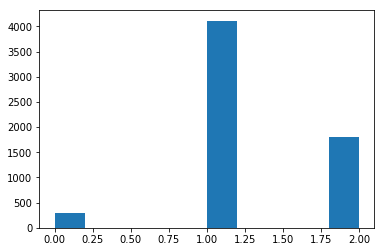

In [119]:
plt.hist(y_preds)

In [120]:
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.30      0.38      0.34       289
          1       0.84      0.98      0.90      4112
          2       0.99      0.57      0.72      1795

avg / total       0.86      0.83      0.82      6196



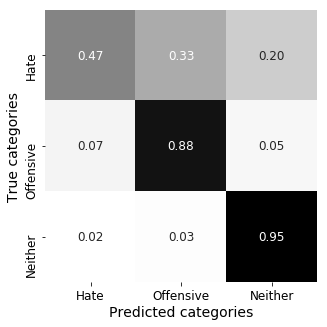

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

(array([ 540.,    0.,    0.,    0.,    0., 4075.,    0.,    0.,    0.,
        1581.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

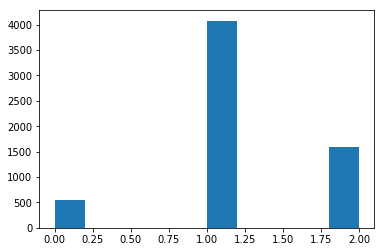

In [80]:
plt.hist(y_preds)

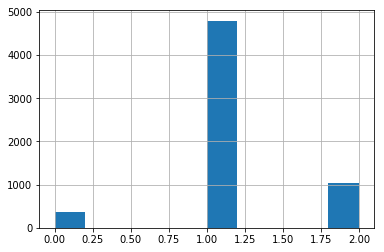

In [81]:
y_test.hist()

## 4.2 using lemmatization

In [122]:
X = pd.DataFrame(M_lem)
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [123]:
def train_model(model):
    # feature selection
    select = SelectFromModel(model)
    select.fit(X_train, y_train)
    X_new = select.transform(X_train)
    X_test_new = select.transform(X_test)

    # cross validation 
    gs = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, random_state=33).split(X_new, y_train), verbose=2)
    gs_model = gs.fit(X_new, y_train)
    y_pred = gs_model.predict(X_test_new)
    report = classification_report(y_pred, y_test)
    print(report)
    return

### 4.2.1 Logistic Regression + L2

In [124]:
lr2 = LogisticRegression(class_weight='balanced',penalty="l2", C=0.01)
train_model(lr2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   9.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV] ................................................. , total=   9.1s
[CV]  ................................................................
[CV] ................................................. , total=   8.3s
[CV]  ................................................................
[CV] ................................................. , total=   8.4s
[CV]  ................................................................
[CV] ................................................. , total=   8.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.2s finished


             precision    recall  f1-score   support

          0       0.38      0.35      0.36       389
          1       0.90      0.92      0.91      4703
          2       0.77      0.73      0.75      1104

avg / total       0.85      0.85      0.85      6196



### 4.2.2 Logistic Regression + L1

In [125]:
lr1 = LogisticRegression(class_weight='balanced',penalty="l1", C=0.01)
train_model(lr1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   3.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] ................................................. , total=   9.6s
[CV]  ................................................................
[CV] ................................................. , total=   9.8s
[CV]  ................................................................
[CV] ................................................. , total=  13.5s
[CV]  ................................................................
[CV] ................................................. , total=   8.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.3s finished


             precision    recall  f1-score   support

          0       0.47      0.42      0.44       409
          1       0.89      0.94      0.91      4514
          2       0.85      0.69      0.76      1273

avg / total       0.85      0.86      0.85      6196



### 4.2.3 Linear SVC

In [126]:
lsvc = LinearSVC(penalty="l2",C=0.01,multi_class='ovr')
train_model(lsvc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  11.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] ................................................. , total=  10.6s
[CV]  ................................................................
[CV] ................................................. , total=  10.4s
[CV]  ................................................................
[CV] ................................................. , total=  10.4s
[CV]  ................................................................
[CV] ................................................. , total=  10.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.7s finished


             precision    recall  f1-score   support

          0       0.27      0.29      0.28       334
          1       0.91      0.90      0.90      4864
          2       0.68      0.71      0.70       998

avg / total       0.84      0.83      0.84      6196



### 4.2.4 Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)
train_model(rf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  17.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s


[CV] ................................................. , total=  14.0s
[CV]  ................................................................
[CV] ................................................. , total=  14.8s
[CV]  ................................................................
[CV] ................................................. , total=  12.5s
[CV]  ................................................................
[CV] ................................................. , total=  11.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


             precision    recall  f1-score   support

          0       0.03      0.57      0.06        21
          1       0.98      0.86      0.92      5437
          2       0.60      0.84      0.70       738

avg / total       0.93      0.86      0.89      6196



### 4.2.5 Decision Tree

In [128]:
dt = tree.DecisionTreeClassifier()
train_model(dt)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] ................................................. , total=   8.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.2s
[CV]  ................................................................
[CV] ................................................. , total=   8.3s
[CV]  ................................................................
[CV] ................................................. , total=   9.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.6s finished


             precision    recall  f1-score   support

          0       0.24      0.26      0.25       341
          1       0.90      0.89      0.89      4820
          2       0.66      0.66      0.66      1035

avg / total       0.82      0.82      0.82      6196



### 4.2.6 Grid Search

In [129]:
# grid search cross validation: 
pipe = Pipeline(
        [('lr1', SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1", C=0.01))),
         ('lsvc', SelectFromModel(LinearSVC(penalty="l2",C=0.01,multi_class='ovr'))),
#          ('RF',SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0))),
         ('DT',SelectFromModel(tree.DecisionTreeClassifier())),
        ('model', LogisticRegression(class_weight='balanced',penalty='l1',C=0.01))])

In [130]:
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5, random_state=33).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=  16.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV] ................................................. , total=  26.8s
[CV]  ................................................................
[CV] ................................................. , total=  27.9s
[CV]  ................................................................
[CV] ................................................. , total=  27.9s
[CV]  ................................................................
[CV] ................................................. , total=  30.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [131]:
y_preds = model.predict(X_test)
y_preds

array([1, 1, 2, ..., 1, 1, 0])

In [132]:
report = classification_report(y_preds,y_test)
print(report)

             precision    recall  f1-score   support

          0       0.39      0.37      0.38       381
          1       0.87      0.92      0.90      4539
          2       0.78      0.64      0.70      1276

avg / total       0.82      0.83      0.82      6196

